In [1]:
import os
import sys 
os.chdir("/workspaces/dev/modules")
sys.path.append("/workspaces/dev/models/R-CNN")

In [20]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from Pills import DataLoader

In [9]:
BATCH_SIZE = 1
ANNOTATION_PATH = "/workspaces/dev/datasets/pills/data/annotations.json"
IMAGE_DIR = "/workspaces/dev/datasets/pills"
INPUT_SHAPE = (128, 128, 3)

In [27]:
def show(img):
  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.show()

In [5]:
data_loader = DataLoader(BATCH_SIZE, IMAGE_DIR, ANNOTATION_PATH)

In [6]:
train_sequence = data_loader.get_train_sequence()

In [114]:
def generate_background(color:tuple[int] = None, size:tuple[int] = INPUT_SHAPE):
  if color is None:
    color = np.random.randint(0, 255, 3)
  color = color/255
  background = np.empty(size, dtype=np.float64)
  background[:, :] = color
  return background

In [120]:
def merge_object_with_background(object_img:np.ndarray, background:np.ndarray):
  background = background.copy()
  mask = object_img <= 0
  merged = np.where(mask, background, object_img)

  return merged

In [121]:
train, target = train_sequence[0]
train = train[0]
target = target[0]

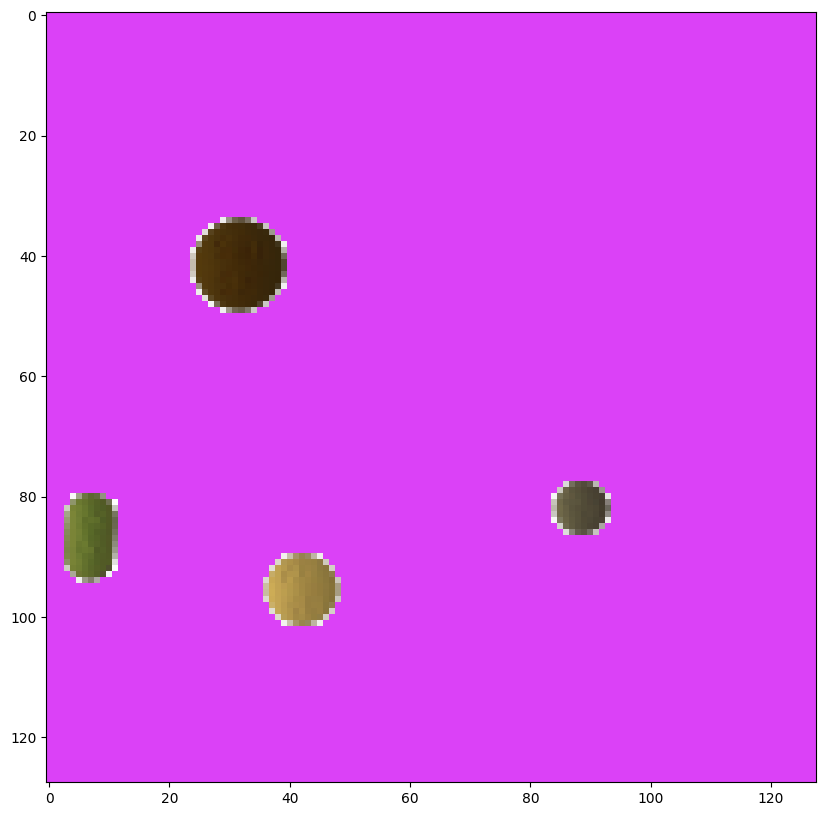

In [127]:
background = generate_background()
merged = merge_object_with_background(train, background)
# show(background)
# show(train)
show(merged)